In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")


In [22]:
from google.colab import files
uploaded = files.upload()

Saving data.csv to data (2).csv


In [25]:
import io 
df = pd.read_csv(io.BytesIO(uploaded['data.csv']))
df

,Unnamed: 0,job_title,company,job_location,job_summary,post_date,today,job_salary,company_id,job_requirement,eligibility,experience_req,company_rating
0,5,Senior Data Analyst,AdTech Holding,"Bengaluru, Karnataka",Work on the development of the PropellerAds pr...,EmployerActive 5 days ago,7/26/2022,70000,6,- Supervises financial management and administ...,All capable people,2 Years Job Exp.,3.2
1,19,Data Analyst,Maersk,"Chennai, Tamil Nadu",Analyze data and develop machine learning mode...,PostedPosted 7 days ago,7/26/2022,260000,20,- Working with the Country Director to provide...,University students,2 Years Job Exp.,3.8
2,21,Data analyst,Honeywell,"Bengaluru, Karnataka",Join a company that is transforming from a tra...,PostedPosted 7 days ago,7/26/2022,85000,22,- Identify gaps in knowledge and overseeing in...,Everyone,< 1 Year,3.4
3,40,Operation Analyst,Financial Fabric,"Kolkata, West Bengal",It combines traditional big data and machine l...,Hiring ongoing,7/26/2022,20000,41,- Rendering technical assistance to Database M...,All Interested Candidates,Job for Fresh Graduates,4.1
4,45,KYC System Analyst,Brickendon Consulting,"Remote in Hyderabad, Telangana","Focused on three practice areas of digital, da...",Posted7 days ago,7/26/2022,150000,46,- Coordinating the work of subordinate employe...,Applicants must hold Armenian\r\ncitizenship\r...,< 1 Year,3.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...
522,1577,Business Analyst-Business Intelligence,"Netrika, Consulting and Investigations","Gurgaon, Haryana",Training for the above profile would be provid...,PostedPosted 13 days ago,7/26/2022,20000,1578,- To take part in the selection process by int...,All interested and qualified candidates.,< 1 Year,4.3
523,1579,Business Analyst,Shri Ramswaroop Digital Technologies Pvt. Ltd.,"Lucknow, Uttar Pradesh",Lead efforts to gather and analyze data requir...,EmployerActive 4 days ago,7/26/2022,405000,1580,- Management of the company's fast food site;\...,Applicants from Armenia or CIS.,2 Years Job Exp.,4.3
524,1580,Research Analyst - Central Events (Hybrid),Janes,"Bengaluru, Karnataka","Linking millions of assured data points, Janes...",PostedPosted 20 days ago,7/26/2022,135000,1581,- Auditing businesses of the company in accord...,Applicants from Armenia or CIS.,2 Years Job Exp.,3.2
525,1581,Program Research Analyst – Sustainable Cities ...,WRI India,"Mumbai, Maharashtra",Design and implement quantitative and qualitat...,PostedPosted 18 days ago,7/26/2022,177000,1582,The successful candidate will be responsible f...,The School is open to persons aged from\r\n19 ...,2 Years Job Exp.,4.5


In [56]:
df.replace(₹3,00,000 - ₹6,00,000 a year	, 48000)

SyntaxError: ignored

In [27]:
df.nunique()


Unnamed: 0         527
job_title          287
company            527
job_location       104
job_summary        514
post_date           65
today                1
job_salary         245
company_id         527
job_requirement    494
eligibility        180
experience_req      12
company_rating      31
dtype: int64

<Figure size 720x360 with 0 Axes>

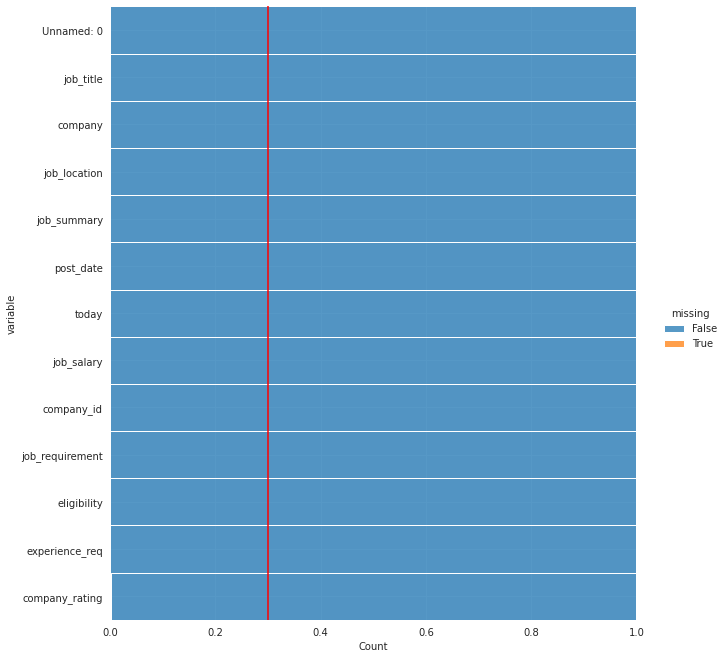

In [31]:

plt.figure(figsize = (10, 5))
sns.displot(
    data = df.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)
plt.axvline(0.3, color = "r")
plt.show()

In [42]:
df['job_title'].value_counts(dropna=False).head(30)


Data Analyst                         171
Business Analyst                      31
Senior Data Analyst                   11
Sr. Data Analyst                       6
Data Research Analyst                  4
Quality Analyst                        4
DATA ANALYST                           3
Data Governance Analyst                3
Research Analyst                       3
BI Data Analyst                        2
QA Analyst                             2
Operation Analyst                      2
Data Analyst Intern                    2
Product Data Analyst                   2
Senior Clinical Data Analyst           2
Senior Business Analyst                2
Data Operations Analyst                2
Associate Data Analyst                 2
Data Engineer / Data Analyst           2
Data Analyst (Power BI)                2
Cyber Security Analyst                 2
Operations Analyst                     2
Excel Analyst                          1
Data Analyst Lead | Connecticut        1
Data Analyst - D

In [44]:
df['job_title'].sample(20)


187    Data Analyst || Diamond Industry || Surat Loca...
246                                         Data Analyst
322                                         Data Analyst
261                                     Big Data Analyst
519           Data Analyst - Regulatory Risk and Finance
73                            Business Technical Analyst
392                                         Data Analyst
60                                          Data Analyst
425                                      Pricing Analyst
32                                          Data Analyst
2                                           Data analyst
452                            Data Processing Analyst I
203                                     Sr. Data Analyst
88                             Data Analyst with Tableau
401                                         Data Analyst
144                                         Data Analyst
397                       Data Analyst (ONSITE – EUROPE)
61                             

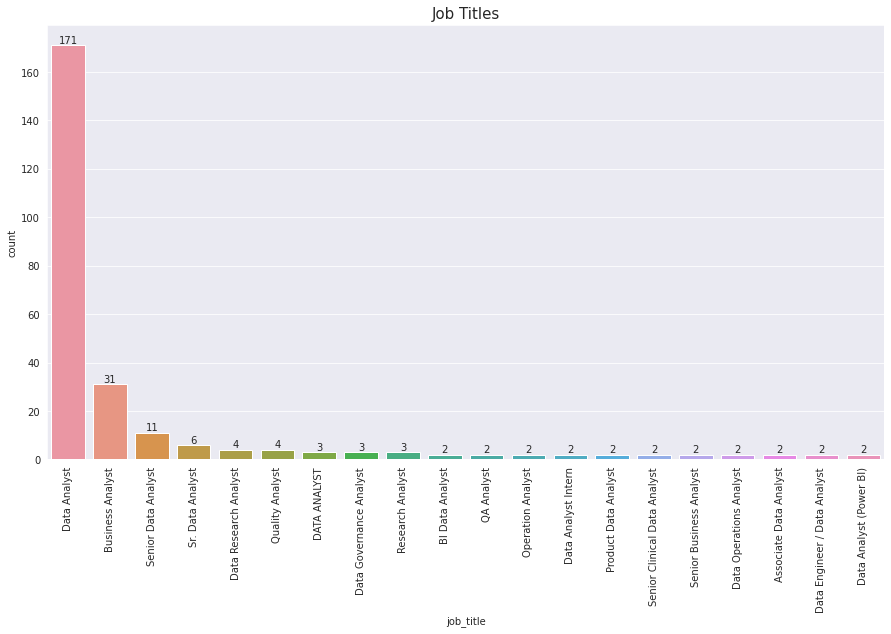

In [47]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'job_title', data = df, order = df['job_title'].value_counts()[:20].index)
plt.title('Job Titles', fontsize = 15)
plt.xticks(rotation=90)


for index, value in enumerate(df['job_title'].value_counts()[:20].values):
    plt.text(index,value,str(value), ha = 'center', va= 'bottom')

In [49]:
df['company'].value_counts()


AdTech Holding                1
Sagar Infotech                1
Travel Centric Technology     1
Navtech                       1
Intel                         1
                             ..
Target Hydrautech Pvt Ltd.    1
Concentrix                    1
FullContact                   1
Morningstar                   1
Angara E-Commerce Pvt Ltd     1
Name: company, Length: 527, dtype: int64

In [50]:
def show_distribution(col):
    '''
    This function will make a distribution (graph) and display it    '''

    # Get statistics
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (15,10))

    # Plot the histogram   
    ax[0].hist(col)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Minimum')
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2, label='Mean')
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2, label='Median')
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2, label='Mode')
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    ax[1].boxplot(col, vert=False)
    ax[1].set_xlabel('value', fontsize=10)

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=15)

In [51]:
def show_density(col):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(15,5))

    # Plot density
    col.plot.density()

    # Add titles and labels
    plt.title('Data Density', fontsize=15)

    # Show the mean, median, and mode
    plt.axvline(x=col.mean(), color = 'cyan', linestyle='dashed', linewidth = 2, label = 'Mean')
    plt.axvline(x=col.median(), color = 'red', linestyle='dashed', linewidth = 2, label = 'Median')
    plt.axvline(x=col.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2, label = 'Mode')
    plt.legend()

    # Show the figure
    plt.show()


Minimum:1.00
Mean:3.53
Median:3.60
Mode:2.30
Maximum:5.00



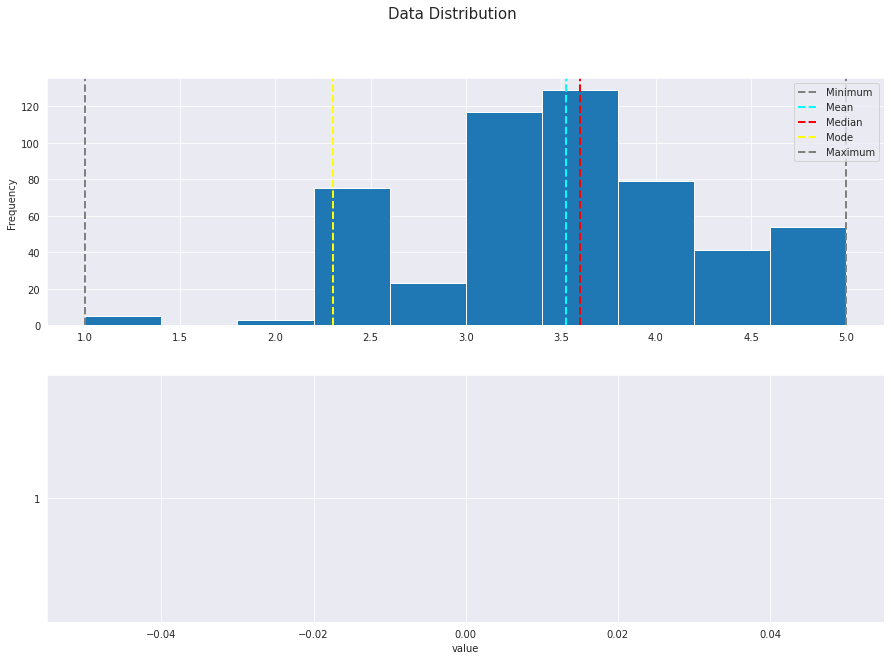

In [53]:
show_distribution(df['company_rating'])


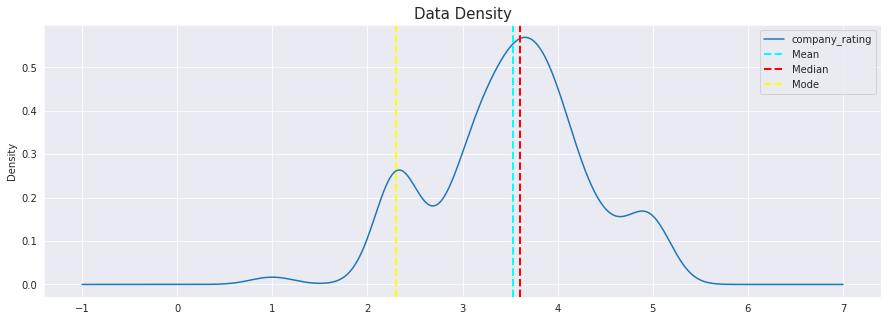

In [54]:
show_density(df['company_rating'])


In [59]:
df = df.head(526)

In [61]:
df = df.astype({'job_salary':'int'})


Minimum:4000.00
Mean:352690.00
Median:110000.00
Mode:80000.00
Maximum:30400000.00



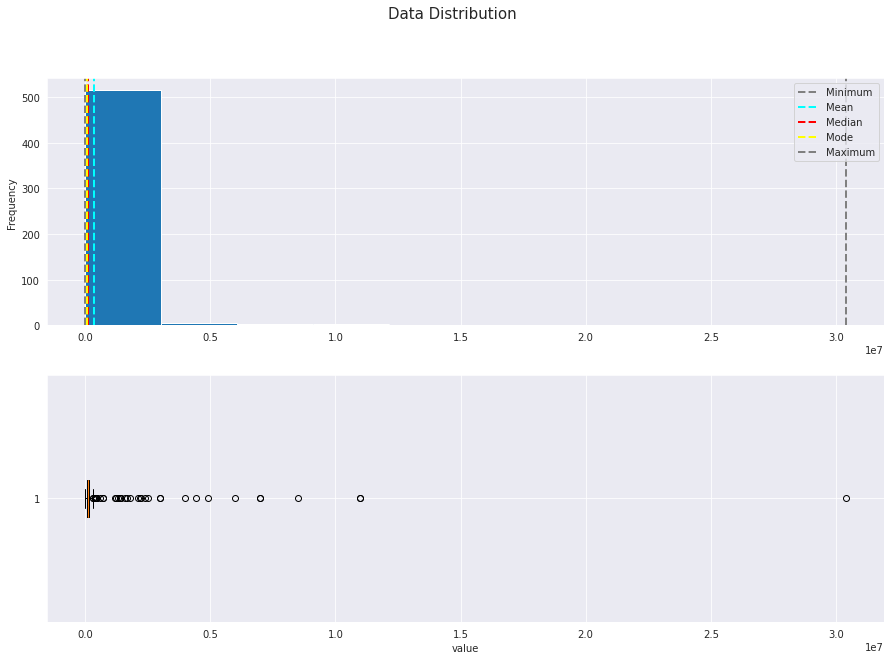

In [62]:
show_distribution(df['job_salary'])


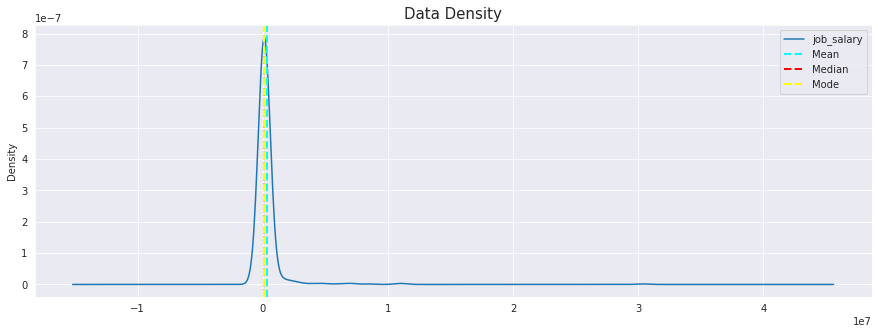

In [63]:
show_density(df['job_salary'])


In [64]:
df['job_title'].value_counts()[:30]


Data Analyst                         170
Business Analyst                      31
Senior Data Analyst                   11
Sr. Data Analyst                       6
Data Research Analyst                  4
Quality Analyst                        4
DATA ANALYST                           3
Data Governance Analyst                3
Research Analyst                       3
BI Data Analyst                        2
QA Analyst                             2
Operation Analyst                      2
Data Analyst Intern                    2
Product Data Analyst                   2
Senior Clinical Data Analyst           2
Senior Business Analyst                2
Data Operations Analyst                2
Associate Data Analyst                 2
Data Engineer / Data Analyst           2
Data Analyst (Power BI)                2
Cyber Security Analyst                 2
Operations Analyst                     2
Excel Analyst                          1
Data Analyst Lead | Connecticut        1
Data Analyst - D

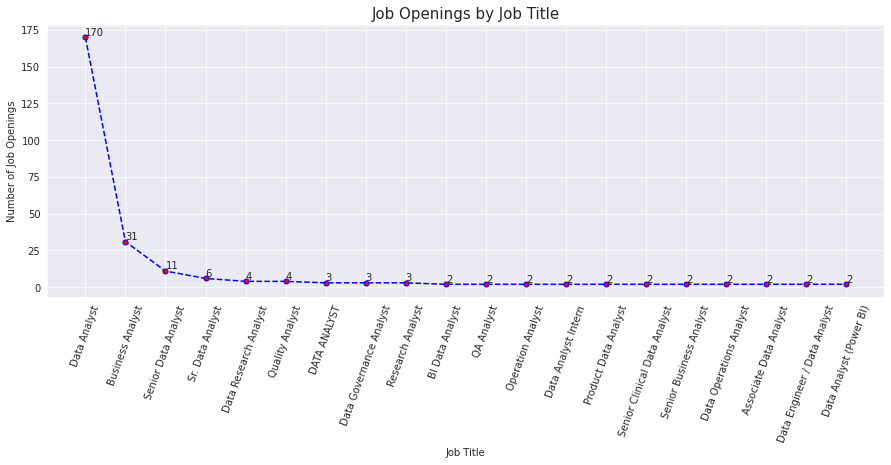

In [65]:

plt.figure(figsize=(15,5))
plt.plot(df['job_title'].value_counts()[:20].index, df['job_title'].value_counts()[:20].values, 
         color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=5)
plt.title('Job Openings by Job Title', fontsize=15)
plt.xlabel('Job Title')
plt.ylabel('Number of Job Openings')
for index, value  in enumerate(df['job_title'].value_counts()[:20].values):
    plt.text(index,value,str(value), va = 'bottom')
plt.xticks(rotation=70);

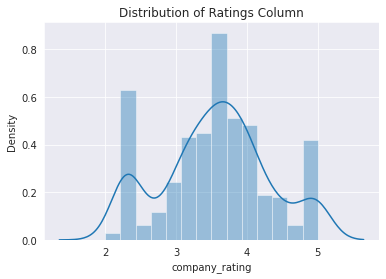

In [69]:
df1 = df[df["company_rating"]>1]
sns.distplot(df1["company_rating"],)
plt.title('Distribution of Ratings Column')
plt.show()

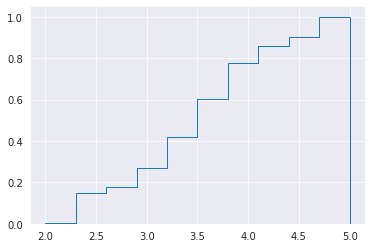

In [71]:
plt.hist(df1['company_rating'], density=True, cumulative=True, label='CDF',histtype='step');


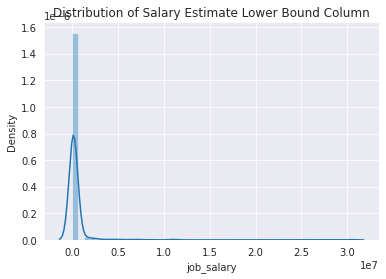

In [73]:
sns.distplot(df["job_salary"])
plt.title('Distribution of Salary Estimate Lower Bound Column')
plt.show()

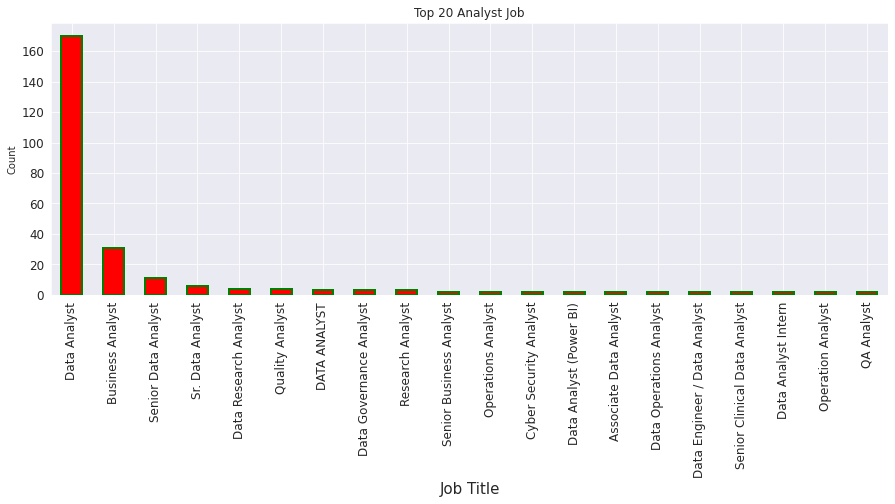

In [76]:
plt.figure(figsize = (15,5))
df["job_title"].value_counts().sort_values(ascending=False).head(20).plot.bar(color= "Red", fontsize=12, edgecolor='green',linewidth = 2)
plt.title("Top 20 Analyst Job")
plt.xlabel("Job Title",fontsize=15)
plt.ylabel("Count")
plt.show()

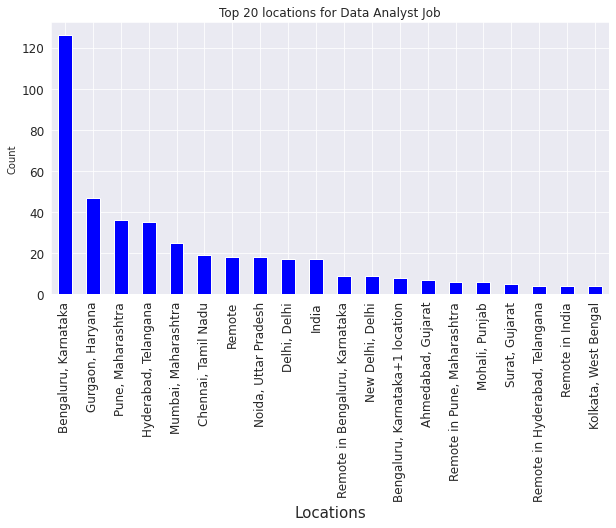

In [77]:
plt.figure(figsize = (10,5))
df["job_location"].value_counts().sort_values(ascending=False).head(20).plot.bar(color= "Blue", fontsize=12)
plt.title("Top 20 locations for Data Analyst Job")
plt.xlabel("Locations",fontsize=15)
plt.ylabel("Count")
plt.show()

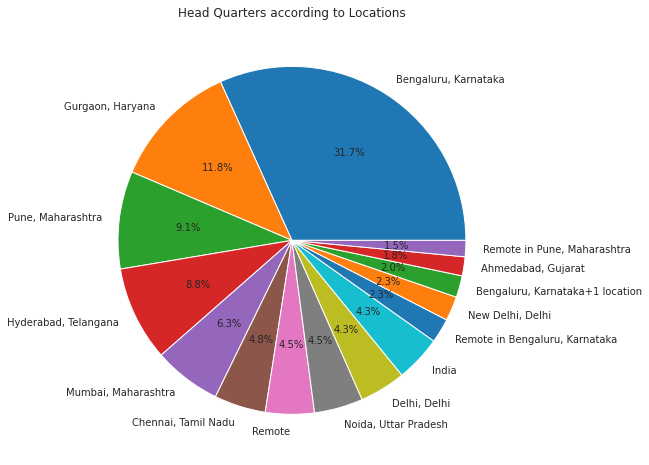

In [78]:
plt.figure(figsize = (50,8))
df["job_location"].value_counts().sort_values(ascending=False).head(15).plot.pie(y="Headquarters",autopct="%0.1f%%")
plt.title("Head Quarters according to Locations")
plt.axis("off")
plt.show()

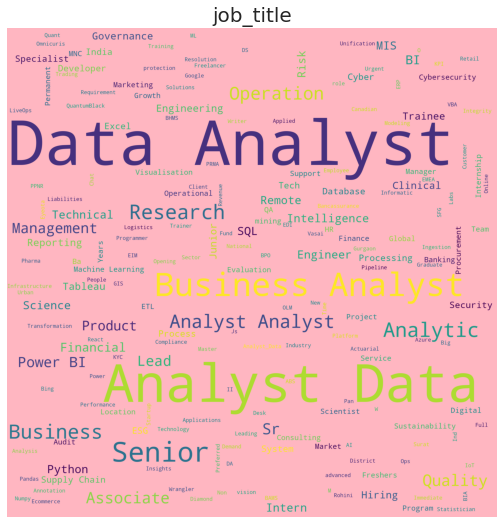

In [92]:
from wordcloud import WordCloud
job_title=df['job_title'][~pd.isnull(df['job_title'])]
wordCloud = WordCloud(background_color = 'lightpink',width=2000,height= 2000).generate(' '.join(job_title))
plt.figure(figsize=(19,9))
plt.axis('off')
plt.title(df['job_title'].name,fontsize=20)
plt.imshow(wordCloud)
plt.show()